In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\Lenovo\\Documents\\Isaac\\traderar\\')



from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from matplotlib import pyplot as plt
from a_earnings_trader20200125 import earnings_trader
from b_volume_trader20200125 import volume_trader
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy import stats
import scipy.cluster.hierarchy as hac
import math
from sklearn.datasets import make_classification
from xgboost import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

from mlxtend.plotting import scatterplotmatrix

## Innlestur verðkannana aðferð 1


In [2]:
path='C:\\Users\\Lenovo\\Documents\\Verðkannanir\\'

file=path+'Verðkönnun ASÍ.xlsx'

xl = pd.ExcelFile(file) 
df = xl.parse('20210325T',na_values=["e"])



df=df.applymap(lambda x: df.nan if x == 'e' else x)


df= df.fillna(method="bfill", axis="columns")
df= df.fillna(method="ffill", axis="columns")


df.head(10)

,Bónus,Fjarðarkaup,Hagkaup,Heimkaup,Iceland,Kjörbúðin,Krónan,Nettó
0,162,161,169.0,162.0,164.0,165,164.0,165.0
1,162,169,169.0,162.0,164.0,163,163.0,167.0
2,289,398,319.0,289.0,369.0,325,325.0,349.0
3,1716,1952,1901.0,1471.0,1399.0,1499,1399.0,1399.0
4,561,578,599.0,560.0,557.0,563,562.0,563.0
5,543,584,579.0,543.0,545.0,546,545.0,548.0
6,505,532,579.0,496.0,649.0,649,506.0,569.0
7,329,372,409.0,339.0,331.0,342,330.0,342.0
8,455,455,449.0,441.0,579.0,599,479.0,499.0
9,637,660,669.0,638.0,639.0,641,640.0,641.0


## Innlestur verðkannana aðferð 2

In [3]:



xl = pd.ExcelFile(file) 
df = xl.parse('20210325T',na_values=["e","em"])

df=df.applymap(lambda x: df.nan if x == 'e' else x)
df=df.applymap(lambda x: df.nan if x == 'em' else x)



df['miðgildi'] = df.median(axis=1)

print(df['miðgildi'])


df['Bónus'].fillna(df['miðgildi'], inplace = True)
df['Krónan'].fillna(df['miðgildi'], inplace = True)
df['Nettó'].fillna(df['miðgildi'], inplace = True)
df['Kjörbúðin'].fillna(df['miðgildi'], inplace = True)
df['Iceland'].fillna(df['miðgildi'], inplace = True)
df['Fjarðarkaup'].fillna(df['miðgildi'], inplace = True)
#df['Krambúðin'].fillna(df['miðgildi'], inplace = True)
df['Hagkaup'].fillna(df['miðgildi'], inplace = True)
df['Heimkaup'].fillna(df['miðgildi'], inplace = True)
#df['Kr. búðin'].fillna(df['miðgildi'], inplace = True)
#df['Extra'].fillna(df['miðgildi'], inplace = True)
#df['Kjarval Hellu'].fillna(df['miðgildi'], inplace = True)
#df['Samkaup Strax'].fillna(df['miðgildi'], inplace = True)

#df= df.loc[:,'Bónus':'Samkaup Strax']



0       164.0
1       163.5
2       325.0
3      1499.0
4       562.5
        ...  
103    1969.0
104    1979.0
105    1869.0
106    2279.0
107    1679.0
Name: miðgildi, Length: 108, dtype: float64


## Hlutfallstafla búin til.

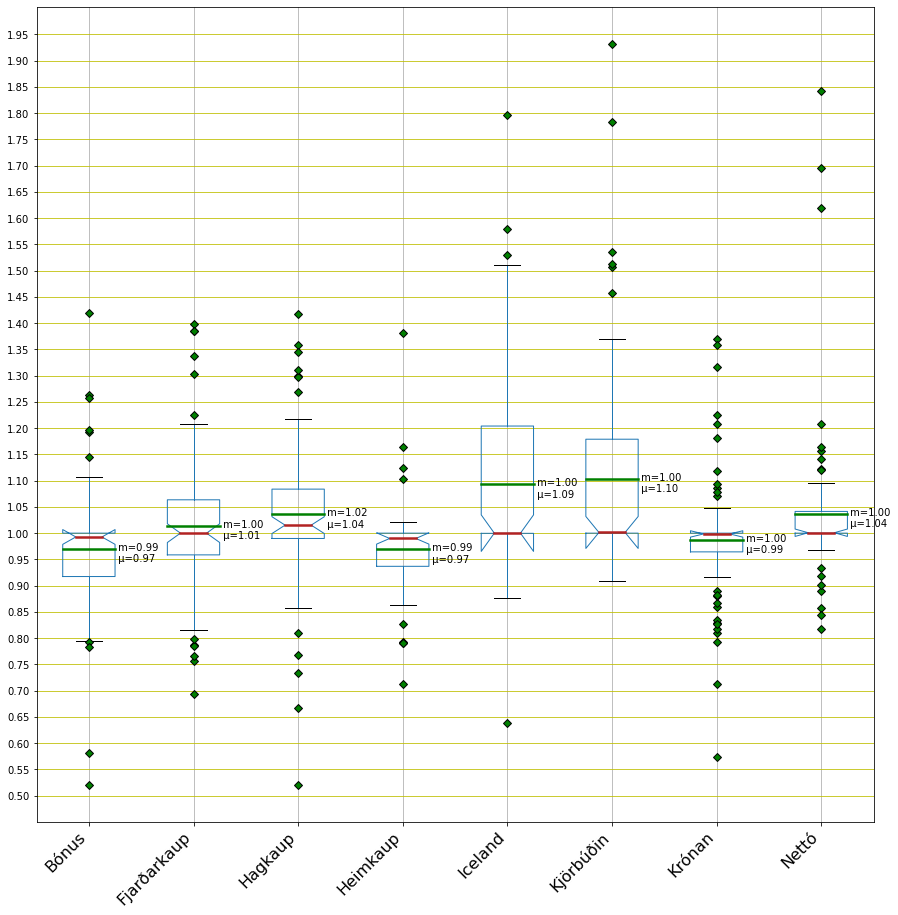

NameError: name 'stop' is not defined

In [4]:
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)
print(scaler.fit(df))
StandardScaler()
df_sc=scaler.transform(df)


fig, ax2 = plt.subplots()
ax2.grid(axis='y', color='r')
plt.boxplot(df_sc)
plt.show()"""
import seaborn as sns

dfAnEggja = df.head(85)
dfEgg = df.tail(23)

df_median = dfAnEggja.divide(dfAnEggja["miðgildi"], axis=0)
df_median = df_median.loc[:, 'Bónus':'Nettó']
fig, ax2 = plt.subplots(figsize=(15, 15))
ax2.grid(axis='y', color='y')
green_diamond = dict(markerfacecolor='g', marker='D')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

meanlineprops = dict(linestyle='-', linewidth=2.5, color='green')
bp=df_median.boxplot(
    meanline=True,
    showmeans=True,
    flierprops=green_diamond,
    manage_ticks=True,
    notch=True,
    medianprops=medianprops,
    meanprops=meanlineprops, 
    return_type='dict',
)


m1 = df_median.median(axis=0)
st1 = df_median.mean(axis=0)

for i, line in enumerate(bp['means']):
    x, y = line.get_xydata()[1]
    text = ' m={:.2f}\n μ={:.2f}'.format(m1[i], st1[i])
    ax2.annotate(text, xy=(x, y-.025))


plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(np.arange(0.5, 2, 0.05))
plt.show()








stop

## Samfylgni reiknuð

,Bónus,Fjarðarkaup,Hagkaup,Heimkaup,Iceland,Kjörbúðin,Krónan,Nettó
Bónus,1.000000,0.981720,0.988118,0.982810,0.985896,0.973775,0.993414,0.986371
Fjarðarkaup,0.981720,1.000000,0.985854,0.988087,0.977464,0.980323,0.982879,0.990568
Hagkaup,0.988118,0.985854,1.000000,0.980520,0.975544,0.969011,0.982702,0.982920
Heimkaup,0.982810,0.988087,0.980520,1.000000,0.981283,0.973966,0.989080,0.989234
Iceland,0.985896,0.977464,0.975544,0.981283,1.000000,0.984609,0.987023,0.986667
Kjörbúðin,0.973775,0.980323,0.969011,0.973966,0.984609,1.000000,0.980249,0.983815
Krónan,0.993414,0.982879,0.982702,0.989080,0.987023,0.980249,1.000000,0.990089
Nettó,0.986371,0.990568,0.982920,0.989234,0.986667,0.983815,0.990089,1.000000


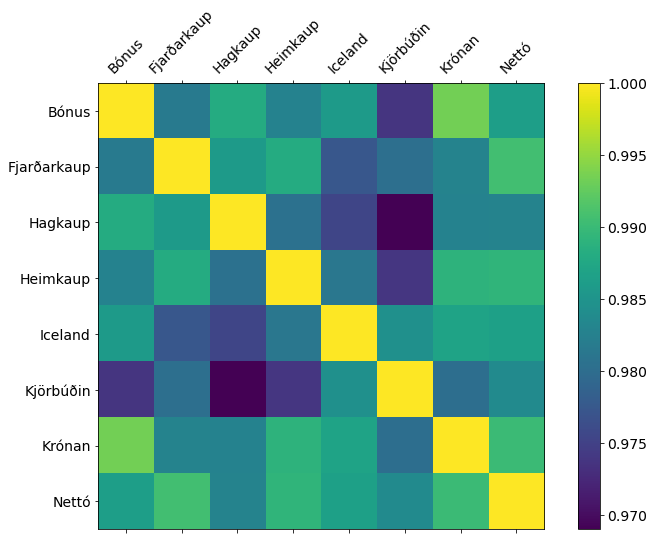

In [5]:
cols = df.columns # Saving column names to a variable
df=df[cols].apply(pd.to_numeric, errors='coerce') # Converting the columns to numeric
df= df.loc[:,'Bónus':'Nettó']
corr=df.corr()    
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

corr


In [ ]:
#df.sort_values(by=['Fjarðarkaup'], inplace=True)


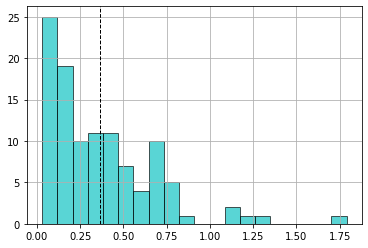

In [6]:
df['max'] = df.max(axis=1)
df['min'] = df.min(axis=1)

df_pr=df['max'].div(df['min'])-1

ax=df_pr.hist(bins =20, color='c',edgecolor='k',alpha=0.65)
plt.axvline(df_pr.mean(), color='k', linestyle='dashed', linewidth=1)

Verðmunur á Krónunni og Fjarðarkaupum 6.júní 2020: 1.7 prósent


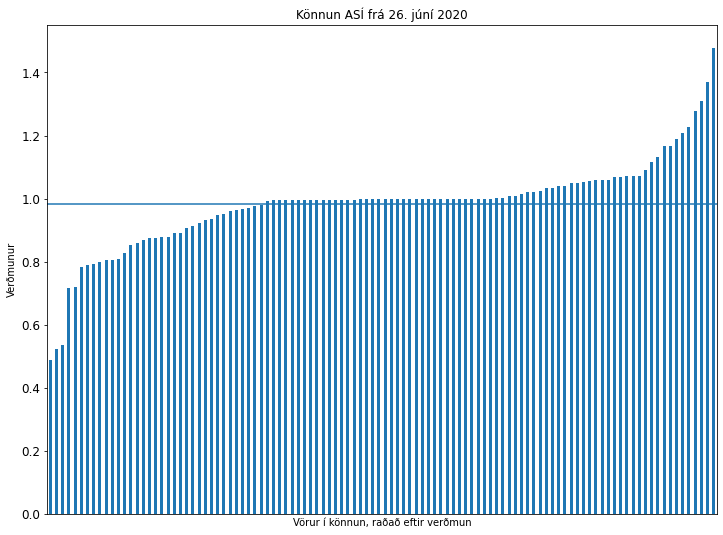

In [9]:
df_av = df.Krónan.div(df.Nettó,axis=0).sort_values()
df_av.plot.bar(fontsize=12, figsize=(12, 9))
mean = df_av.mean()
plt.axhline(mean)

plt.xticks([])
plt.xlabel('Vörur í könnun, raðað eftir verðmun')
plt.ylabel('Verðmunur')
plt.title('Könnun ASÍ frá 26. júní 2020')
a = (1 - df_av.mean()) * 100

print('Verðmunur á Krónunni og Fjarðarkaupum 6.júní 2020: ' + '%.1f' % a +
      ' prósent')

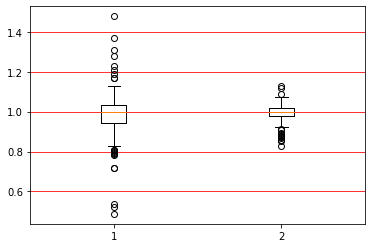

0.9983318693316117 0.9984399375975039
0.008510759708072135


In [10]:
Q1 = df_av.quantile(0.25)
Q3 = df_av.quantile(0.75)
IQR = Q3 - Q1    #IQR er lengd miðjubilsins 

filter = (df_av >= Q1 - 1.5 * IQR) & (df_av <= Q3 + 1.5 *IQR)
df_av1=df_av.loc[filter] 


fig, ax2 = plt.subplots()
ax2.grid(axis='y', color='r')
plt.boxplot([df_av,df_av1])
plt.show()

print(df_av.median(), df_av1.median())

print(1-df_av1.mean())


## Skewness

In [ ]:
from scipy.stats import skew

print(df_av.skew())
print(df_c.skew())
df_av.describe()